In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from textwrap import wrap
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] = im2[index] + e[index]
    return im2
def add_saltnpepper_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2

def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]

def shrink_corrupt_images(image, prop, varSigma):
    image = image/255
    image_G = add_gaussian_noise(image, prop, varSigma)
    image_S = add_saltnpepper_noise(image, prop)
    return image, image_G, image_S

def create_corrupt_titles(prop, varSigma, num):
    title1 = "Image, original"
    title2 = "Image after corruption with Gaussian noise, " + str(int(100*prop)) + "% of the pixels altered with variance = " + str(varSigma)
    title3 = "Image after corruption with salt-n-pepper noise, " + str(int(100*prop)) + "% of the pixels altered"
    return title1, title2, title3

def create_denoise_titles(num, iterations):
    title1 = "Image after corruption with Gaussian noise and subsequent MFVB denoising, with " + str(iterations) + " iterations"
    title2 = "Image after corruption with salt-n-pepper noise and subsequent MFVB denoising, with " + str(iterations) + " iterations"
    return title1, title2

def display_three_images(image1, title1, image2, title2, image3, title3):    
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(131)
    ax1.set_title("\n".join(wrap(title1, 35)))
    ax1.axis('off')
    ax1.imshow(image1,cmap='gray')
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("\n".join(wrap(title2, 35)))
    ax2.axis('off')
    ax2.imshow(image2,cmap='gray')
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("\n".join(wrap(title3, 35)))
    ax3.axis('off')
    ax3.imshow(image3,cmap='gray')
    
    plt.show()
    
def save_three_images(image1, title1, image2, title2, image3, title3, fpath):    
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(131)
    ax1.set_title("\n".join(wrap(title1, 35)))
    ax1.axis('off')
    ax1.imshow(image1,cmap='gray')
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("\n".join(wrap(title2, 35)))
    ax2.axis('off')
    ax2.imshow(image2,cmap='gray')
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("\n".join(wrap(title3, 35)))
    ax3.axis('off')
    ax3.imshow(image3,cmap='gray')
    
    plt.savefig(fpath)
    
    
    

In [54]:
from numpy import genfromtxt
im4 = genfromtxt('im4.csv', delimiter =',')
im4_G = genfromtxt('im4_G.csv', delimiter =',')
im4_S = genfromtxt('im4_S.csv', delimiter =',')

no stored variable im4
no stored variable im4_G
no stored variable im4_S


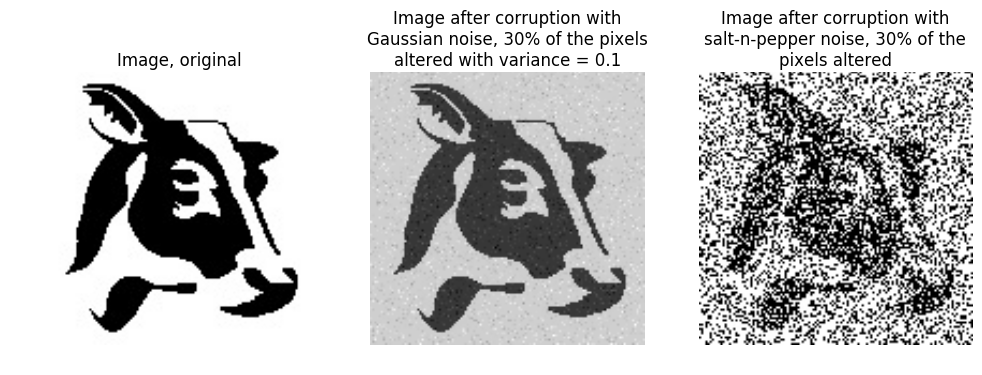

In [55]:
# proportion of pixels to alter
prop = 0.3
varSigma = 0.1

# im1 = imread("../images/manan_grey_resize.jpg")
# im1, im1_G, im1_S = shrink_corrupt_images(im1, prop, varSigma)
# im1_title1, im1_title2, im1_title3 = create_corrupt_titles(prop, varSigma, 1)

# im2 = imread("../images/mike_grey_resize.jpg")
# im2, im2_G, im2_S = shrink_corrupt_images(im2, prop, varSigma)
# im2_title1, im2_title2, im2_title3 = create_corrupt_titles(prop, varSigma, 2)

# im4 = imread("../images/cow_grey_resize.jpg")
# im4, im4_G, im4_S = shrink_corrupt_images(im4, prop, varSigma)
im4_title1, im4_title2, im4_title3 = create_corrupt_titles(prop, varSigma, 4)
%store -r im4
%store -r im4_G
%store -r im4_S

# display_three_images(im1, im1_title1, im1_G, im1_title2, im1_S, im1_title3)
# display_three_images(im2, im2_title1, im2_G, im2_title2, im2_S, im2_title3)
display_three_images(im4, im4_title1, im4_G, im4_title2, im4_S, im4_title3)

In [56]:
def neighbours(i,j,M,N,size):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        if (i==0 and j==0):
            n=[(0,1), (1,0), (1,1)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1), (1, N-2)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0), (M-2, 1)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1), (M-2, N-2)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j), (1,j-1), (1,j+1)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j), (M-2,j-1), (M-2,j+1)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1), (i-1,1), (i+1,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2), (i-1, N-2), (i+1, N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1), (i-1,j-1), (i-1,j+1), (i+1,j-1), (i+1, j+1)]
        return n

In [135]:
def likeli_single_pos_neg(image, point):
    k = np.copy(image)
    k = 2*(k - 0.5)
    return k[point], (-1 * k[point])

def sigmoid(x):
    return (1/(1+np.exp(-x)))

def MF_Var_Bayes(image, lim):
    H, W = heightWidth(image)
    mu = np.zeros((H,W))
    m = np.copy(image)
    q = np.copy(image)
    Y = np.copy(image)
    X=np.zeros((H,W))

    for i in range(H):
            for j in range(W):
                if Y[(i,j)]>0.5:
                    X[(i,j)]=1
                else:
                    X[(i,j)]=-1
                    
    wHi = 1
    wLo = 1
    
    for iteration in range(lim):
        for i in range(H):
            for j in range(W):
                point = (i, j)
                ns = neighbours(i, j, H, W, 4)
                mi = 0
                LP, LN = likeli_single_pos_neg(image, point)
                for n in ns:
                    if (X[point] == X[n]):
                        w = wHi
                    else:
                        w = wLo
                    
                    mi += w * mu[n]  #1 is weight w
                m[point] = mi
                mu[point] = np.tanh(m[point] + 0.5*(LP - LN))
                
                
    for i in range(H):
        for j in range(W):
            point = (i, j)    
            LP, LN = likeli_single_pos_neg(image, point)
            a = (m[point] + 0.5 *(LP-LN))

            if(sigmoid(2*a)> sigmoid(-2*a)):
                X[point] = 1
            else:
                X[point] = -1
#             q[point] = np.exp(X[point]*m[point] + likeli_single(image, X, point))
    return X

In [136]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
iterslist = [1,2,3,4,5]

for iters in iterslist:


    # im2_G_denoised = MF_Var_Bayes(im2_G, iters)
    np.set_printoptions(suppress=True)
    np.set_printoptions(precision=4)
#     print(im2_G_denoised)
    # im2_S_denoised = MF_Var_Bayes(im2_S, iters)
    # im2_G_denoised_title, im2_S_denoised_title = create_denoise_titles(2, iters)

    im4_G_denoised = MF_Var_Bayes(im4_G, iters)
    print(im4_G_denoised)
    im4_S_denoised = MF_Var_Bayes(im4_S, iters)
    print(im4_S_denoised)
    im4_G_denoised_title, im4_S_denoised_title = create_denoise_titles(4, iters)

    # display_three_images(im2, im2_title1, im2_G, im2_title2, im2_G_denoised, im2_G_denoised_title)
    # display_three_images(im2, im2_title1, im2_S, im2_title3, im2_S_denoised, im2_S_denoised_title)

    t4_1 = "../images/q6/im4_g_MFVB" + str(iters)
    t4_2 = "../images/q6/im4_s_MFVB" + str(iters)  


    save_three_images(im4, im4_title1, im4_G, im4_title2, im4_G_denoised, im4_G_denoised_title, t4_1)
    save_three_images(im4, im4_title1, im4_S, im4_title3, im4_S_denoised, im4_S_denoised_title, t4_2)
# iters = 1
# im2_G_denoised = MF_Var_Bayes(im2_G, iters)
# im2_G_denoised_title, im2_S_denoised_title = create_denoise_titles(2, iters)
# display_three_images(im2, im2_title1, im2_G, im2_title2, im2_G_denoised, im2_G_denoised_title)

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[[ 1.  1.  1. ..., -1. -1.  1.]
 [ 1.  1.  1. ...,  1.  1. -1.]
 [-1.  1.  1. ...,  1.  1. -1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[[ 1.  1.  1. ..., -1. -1.  1.]
 [ 1.  1.  1. ...,  1.  1. -1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [62]:
for iters in iterList:
#     im4_G_denoised = GibbsICM2(im4_G, wHigh, wLow, iters, random = False, display = False)
    t4_2 = "../images/6.2/im4_s_MFVB" + str(iters)  
    im4_S_denoised = MF_Var_Bayes(t4_2, iters)
    if(iters == 1):
        im4_S_denoised1 = im4_S_denoised
    if(iters == 5):
        im4_S_denoised5 = im4_S_denoised
    if(iters == 10):
        im4_S_denoised10 = im4_S_denoised
    if(iters == 50):
        im4_S_denoised50 = im4_S_denoised
    if(iters == 100):
        im4_S_denoised100 = im4_S_denoised
        fpath = "../images/q2/im4_s_Gibbs_random_comparison"
        fig = plt.figure(figsize=(12, 8))
        ax1 = fig.add_subplot(141)
#         ax1.set_title("\n".join(wrap(title1, 35)))
        ax1.axis('off')
        ax1.imshow(im4_S_denoised1,cmap='gray')

        ax2 = fig.add_subplot(142)
#         ax2.set_title("\n".join(wrap(title2, 35)))
        ax2.axis('off')
        ax2.imshow(im4_S_denoised5,cmap='gray')

        ax3 = fig.add_subplot(143)
#         ax3.set_title("\n".join(wrap(title3, 35)))
        ax3.axis('off')
        ax3.imshow(im4_S_denoised10,cmap='gray')
        
        ax4 = fig.add_subplot(144)
#         ax3.set_title("\n".join(wrap(title3, 35)))
        ax4.axis('off')
        ax4.imshow(im4_S_denoised50,cmap='gray')
        
        ax5 = fig.add_subplot(145)
#         ax3.set_title("\n".join(wrap(title3, 35)))
        ax5.axis('off')
        ax5.imshow(im4_S_denoised50,cmap='gray')


        plt.savefig(fpath,bbox_inches='tight')

AttributeError: 'str' object has no attribute 'shape'